                        Evaluation Metrics and Regression Implementation

###**Theoretical Answers**


R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1.


Assumptions of Linear Regression:


Linearity


Independence


Homoscedasticity (equal variance of errors)


Normality of residuals


No multicollinearity


R-squared vs Adjusted R-squared:


R² increases with more variables.


Adjusted R² adjusts for the number of predictors and only increases if the new variable improves the model.


Mean Squared Error (MSE) measures the average of the squares of the errors. It penalizes larger errors more than MAE.


Adjusted R² = 0.85 indicates that 85% of the variation in the dependent variable is explained by the model, adjusted for the number of predictors.


Check normality of residuals using:


Histogram/QQ Plot


Shapiro-Wilk test


Kolmogorov–Smirnov test


Multicollinearity occurs when independent variables are highly correlated. It inflates the variance of coefficients and can make the model unstable.


Mean Absolute Error (MAE) is the average of the absolute differences between predictions and actual values.


Benefits of ML pipeline:


Streamlined workflow


Reproducibility


Automation of preprocessing and modeling


RMSE > MSE for interpretation as it is in the same unit as the target variable, making it easier to understand.


Pickling in Python serializes a Python object into a byte stream. It's useful for saving ML models.


High R-squared means the model explains a large portion of variance, but it doesn’t guarantee good predictions.


Violation of assumptions can lead to biased, inefficient, or misleading estimates.


Address multicollinearity by:


Removing correlated features


Using PCA


Ridge regression


Feature selection removes irrelevant variables, improves model performance, and reduces overfitting.


Adjusted R-squared formula:
 Adjusted R2=1−((1−R2)(n−1)n−p−1)\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)Adjusted R2=1−(n−p−1(1−R2)(n−1)​)
 where nnn = number of observations, ppp = number of predictors.


MSE sensitivity to outliers: Large errors are squared, so outliers heavily influence the value.


Homoscedasticity means constant variance of errors. It's essential for valid statistical inference.


RMSE is the square root of MSE and provides error in the same units as the target variable.


Risk of pickling: It can execute arbitrary code during unpickling, leading to security issues.


Alternatives to pickling:


joblib


ONNX


HDF5 for models like Keras


Heteroscedasticity: Non-constant variance of residuals. It invalidates statistical tests and makes inference unreliable.


Interaction terms allow the model to capture combined effects of features, enhancing predictive power.






Practical:

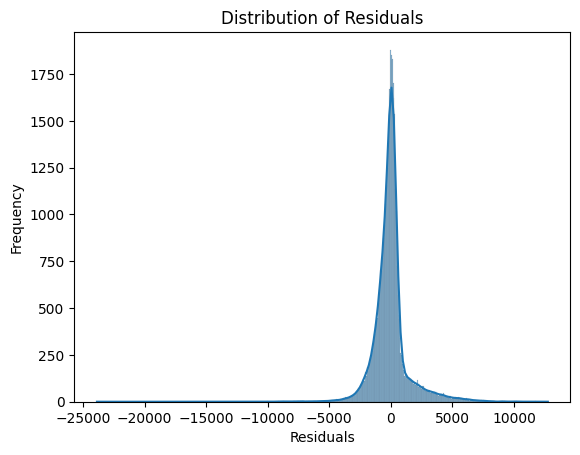

In [1]:
#1. Visualize the Distribution of Errors (Residuals) for a Multiple Linear Regression Model using Seaborn's "diamonds" Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Preprocessing: Use only a subset of columns for simplicity
diamonds = diamonds[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']].dropna()

# Define features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predict values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [2]:
#2. Calculate and Print MSE, MAE, and RMSE for a Linear Regression Model


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load a dataset (example: diamonds)
diamonds = sns.load_dataset("diamonds").dropna()
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")



Mean Squared Error: 2242178.9040856035
Mean Absolute Error: 888.4808633901026
Root Mean Squared Error: 1497.3906985438382


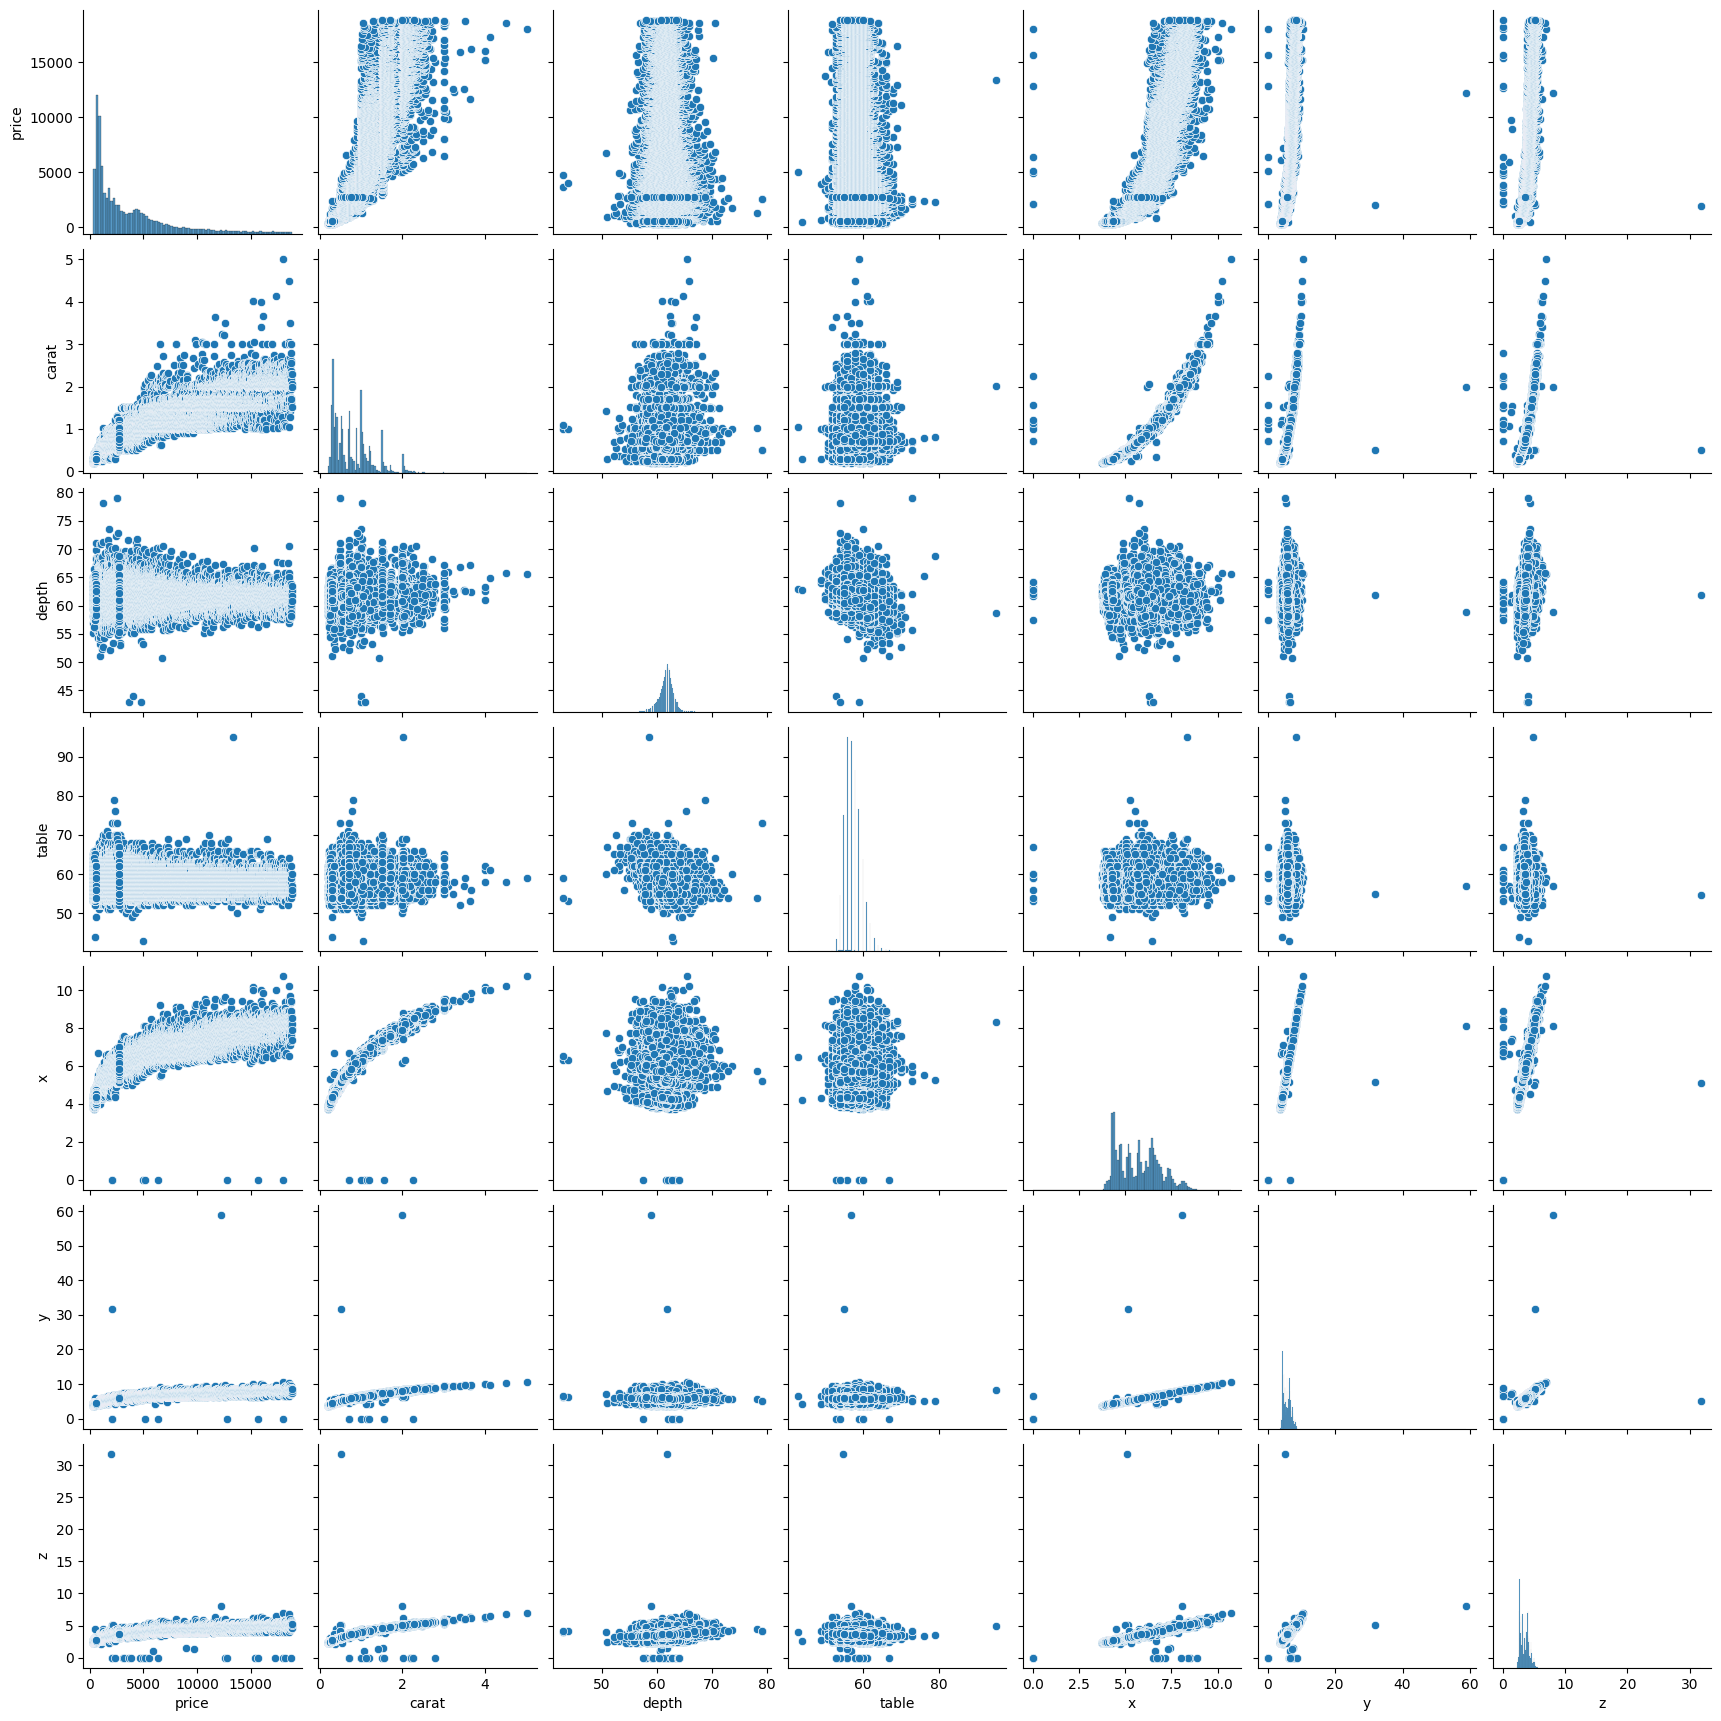

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [3]:
#3. Check Assumptions of Linear Regression (Linearity, Homoscedasticity, Multicollinearity)


import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diamonds = sns.load_dataset("diamonds").dropna()

# Define the features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Add constant to the model for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# 1. Scatter plot to check linearity
sns.pairplot(diamonds[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']])
plt.show()

# 2. Residuals plot to check for homoscedasticity
y_pred = model.predict(X)
residuals = y - y_pred
sns.residplot(y_pred, residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# 3. Correlation matrix for multicollinearity
correlation_matrix = X.drop('const', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# 4. Machine Learning Pipeline with Feature Scaling and Model Evaluation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load dataset
diamonds = sns.load_dataset("diamonds").dropna()
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Try different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    pipeline.set_params(model=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")




Linear Regression MSE: 2242178.9040856035
Decision Tree MSE: 3565785.3757062764
Random Forest MSE: 1904570.7141695956


In [5]:
#5. Simple Linear Regression Model: Print Coefficients, Intercept, and R-Squared Score

from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill']]
y = tips['tip']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients, intercept, and R-squared score
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(X, y)}")


Coefficient: [0.10502452]
Intercept: 0.9202696135546731
R-squared: 0.45661658635167657


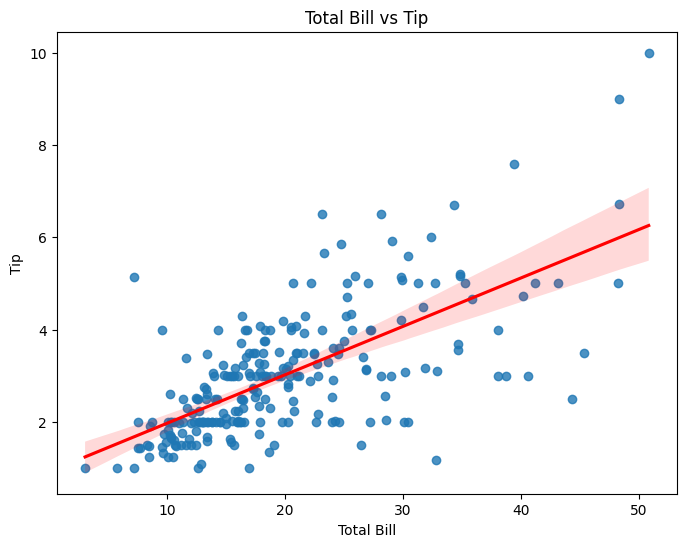

In [6]:
#6. Analyze Relationship Between Total Bill and Tip using Simple Linear Regression


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
tips = sns.load_dataset('tips')

# Define the features and target
X = tips[['total_bill']]
y = tips['tip']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Visualize the data points and regression line
plt.figure(figsize=(8,6))
sns.regplot(x='total_bill', y='tip', data=tips, line_kws={"color": "red"})
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


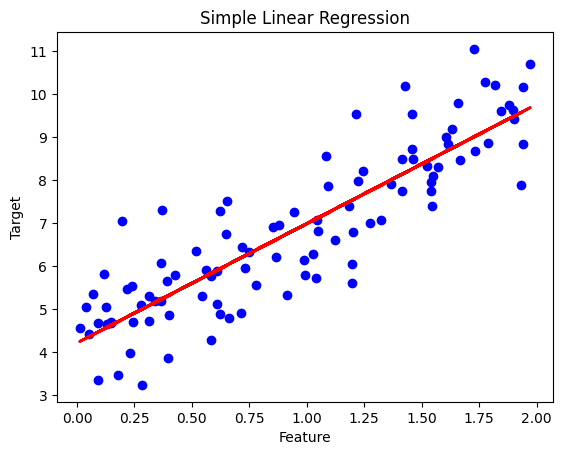

Coefficient: [[2.77011339]]
Intercept: [4.21509616]


In [7]:
#7. Fit a Linear Regression Model to a Synthetic Dataset with One Feature

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title("Simple Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

# Print model coefficients and intercept
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")


In [8]:
#8. Pickle a Trained Linear Regression Model and Save It to a File

import pickle
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load the dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill']]
y = tips['tip']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Pickle the model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved.")


Model has been pickled and saved.


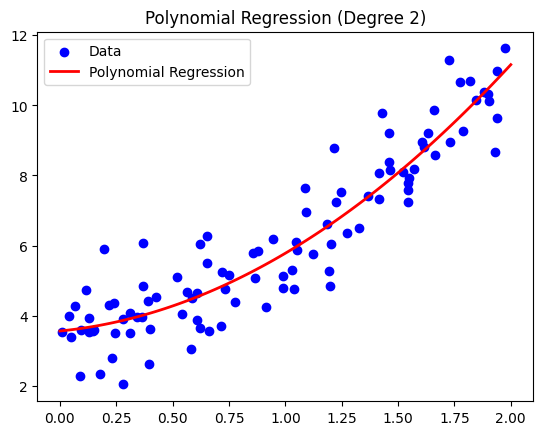

In [9]:
#9. Fit a Polynomial Regression Model (Degree 2) and Plot the Regression Curve


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 2 * X + X**2 + np.random.randn(100, 1)

# Transform the features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict for plotting
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_pred = model.predict(X_plot_poly)

# Plotting
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()


In [10]:
#10. Generate Synthetic Data for Simple Linear Regression and Fit Model


import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 5 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print results
print(f"Coefficient: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")


Coefficient: 2.9080453545753935
Intercept: 4.215096157546751


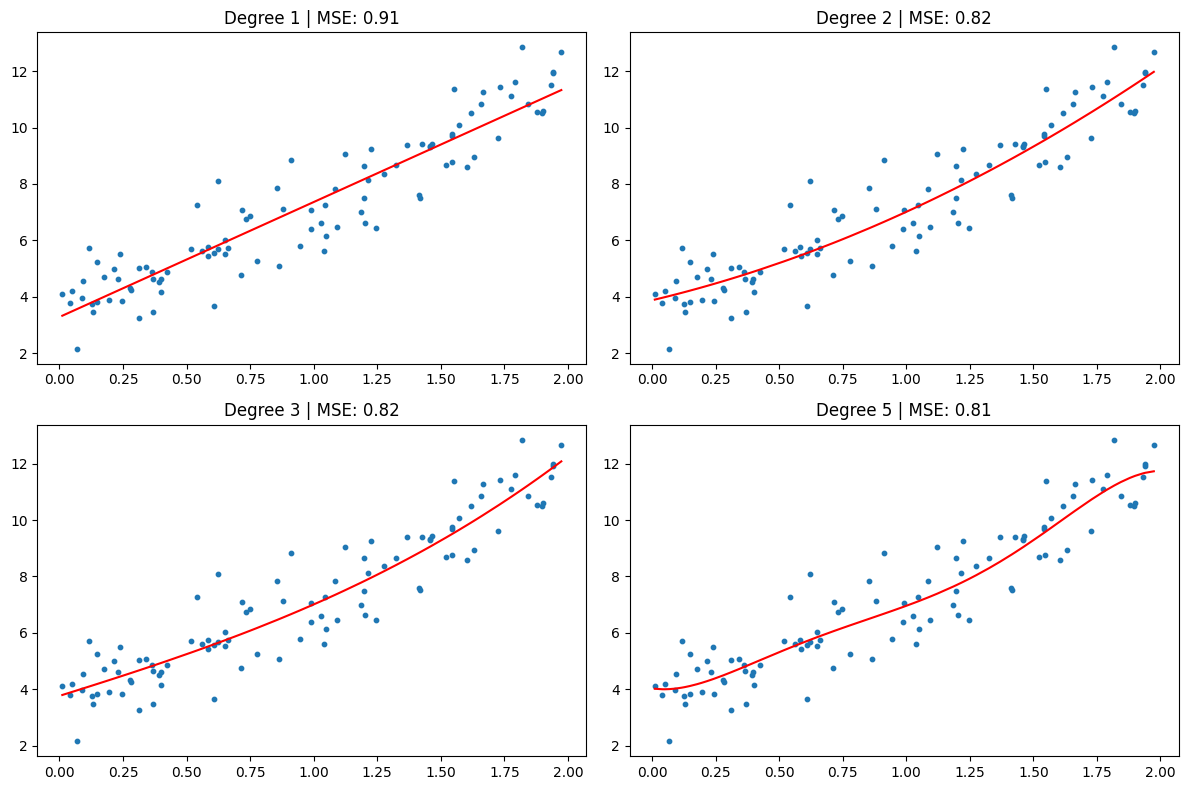

Degree 1 -> MSE: 0.91
Degree 2 -> MSE: 0.82
Degree 3 -> MSE: 0.82
Degree 5 -> MSE: 0.81


In [11]:
#11. Fit Polynomial Regression Models of Different Degrees and Compare Performance


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = 4 + 2 * X + X**2 + np.random.randn(100, 1)

# Degrees to test
degrees = [1, 2, 3, 5]
mse_scores = []

plt.figure(figsize=(12, 8))
for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)

    # Plot
    plt.subplot(2, 2, i)
    plt.scatter(X, y, s=10)
    plt.plot(X, y_pred, color='red')
    plt.title(f'Degree {degree} | MSE: {mse:.2f}')

plt.tight_layout()
plt.show()

# Print summary
for d, m in zip(degrees, mse_scores):
    print(f"Degree {d} -> MSE: {m:.2f}")


In [12]:
#12. Simple Linear Regression Model with Two Features

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Select two features
X = diamonds[['carat', 'depth']]
y = diamonds['price']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {model.score(X, y)}")


Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R-squared Score: 0.8506754571636563


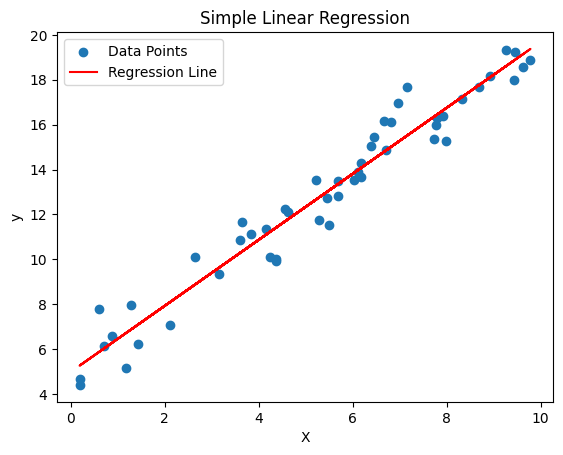

In [13]:
#13. Generate Synthetic Data, Fit Linear Regression, and Visualize

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = 10 * np.random.rand(50, 1)
y = 5 + 1.5 * X + np.random.randn(50, 1)

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, label="Data Points")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [14]:
#14. Check Multicollinearity Using Variance Inflation Factor (VIF)


import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic data
X, _ = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)


     feature       VIF
0  feature_0  1.019320
1  feature_1  1.012651
2  feature_2  1.059337
3  feature_3  1.046592
4  feature_4  1.020596


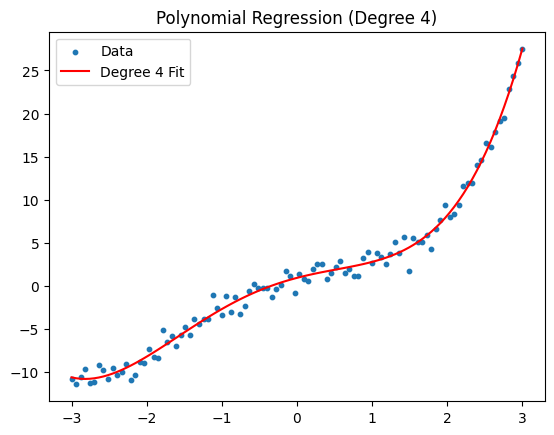

In [15]:
#15. Polynomial Regression (Degree 4) on Synthetic Data


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X - X**2 + 0.5*X**3 + 0.2*X**4 + np.random.randn(100, 1)

# Polynomial transformation
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, s=10, label="Data")
plt.plot(X, y_pred, color="red", label="Degree 4 Fit")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


In [16]:
#16. Pipeline with StandardScaler and Multiple Linear Regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate data
X, y = make_regression(n_samples=100, n_features=4, noise=5.0, random_state=1)

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit and score
pipeline.fit(X, y)
r2_score = pipeline.score(X, y)
print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 0.9984


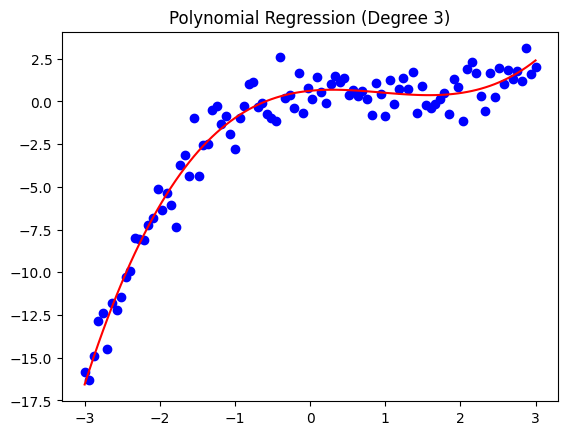

In [17]:
#17. Polynomial Regression (Degree 3) on Synthetic Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Synthetic data
np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 0.5*X - X**2 + 0.3*X**3 + np.random.randn(100, 1)

# Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Model fitting
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [18]:
#18. Multiple Linear Regression on Synthetic Dataset with 5 Features

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X, y)

# Results
print(f"R-squared Score: {model.score(X, y):.4f}")
print(f"Coefficients: {model.coef_}")


R-squared Score: 0.9955
Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]


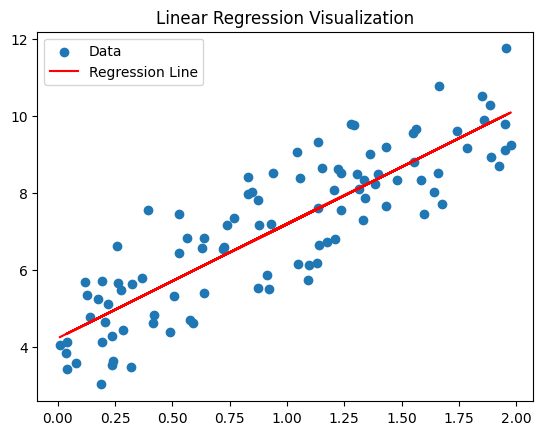

In [19]:
#19. Linear Regression with Visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression Visualization")
plt.legend()
plt.show()


In [20]:
#20. Multiple Linear Regression with 3 Features

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=0)

# Fit model
model = LinearRegression()
model.fit(X, y)

# Output
print(f"R-squared Score: {model.score(X, y):.4f}")
print(f"Coefficients: {model.coef_}")


R-squared Score: 0.9957
Coefficients: [40.03301286  7.18677034 62.31606419]


In [21]:
#21. Serialize and Deserialize Model Using Joblib

import joblib
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate data
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 4 + np.random.randn(100)

# Fit model
model = LinearRegression()
model.fit(X, y)

# Save the model
joblib.dump(model, 'linear_model.joblib')
print("Model saved using joblib.")

# Load the model
loaded_model = joblib.load('linear_model.joblib')
print(f"Loaded Model Coeff: {loaded_model.coef_}, Intercept: {loaded_model.intercept_}")


Model saved using joblib.
Loaded Model Coeff: [2.55996748], Intercept: 4.101897754959296


In [22]:
#22. Linear Regression with Categorical Features (One-Hot Encoding)

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
tips = sns.load_dataset('tips')

# Features and target
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# One-hot encode categorical features
categorical_features = ['sex', 'smoker', 'day', 'time']
numeric_features = ['total_bill']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ],
    remainder='passthrough'  # Keep numerical columns
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split and model fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipeline.fit(X_train, y_train)

# Score
score = pipeline.score(X_test, y_test)
print(f"R-squared Score with One-Hot Encoded Features: {score:.4f}")


R-squared Score with One-Hot Encoded Features: 0.5371


In [23]:
#23. Compare Ridge Regression with Linear Regression

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_regression(n_samples=100, n_features=10, noise=15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_scaled, y)

# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Results
print("Linear Regression Coefficients:", lr.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)
print(f"Linear R²: {lr.score(X_scaled, y):.4f}")
print(f"Ridge R²: {ridge.score(X_scaled, y):.4f}")


Linear Regression Coefficients: [17.16953118 50.28705282  3.10425921 63.96096218 90.52254588 70.40105558
 86.22763759  8.77739083  4.13216042 64.83096538]
Ridge Regression Coefficients: [17.1628548  49.93711807  2.98529738 63.36465703 89.45369906 70.01947025
 85.32164936  8.18094258  4.26184359 64.08081391]
Linear R²: 0.9943
Ridge R²: 0.9942


In [24]:
#24. Cross-Validation for Linear Regression

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Generate synthetic dataset
X, y = make_regression(n_samples=150, n_features=4, noise=10, random_state=0)

# Model
model = LinearRegression()

# Cross-validation scores (R-squared)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R²: {np.mean(scores):.4f}")


Cross-Validation R² Scores: [0.99106403 0.99007769 0.98745649 0.98930539 0.97130948]
Mean R²: 0.9858


In [25]:
#25. Compare Polynomial Regression Models of Different Degrees


import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = 1 + 2 * X + X**2 - 0.5 * X**3 + np.random.randn(100, 1)

# Compare models
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} R-squared: {r2:.4f}")



Degree 1 R-squared: 0.5475
Degree 2 R-squared: 0.5650
Degree 3 R-squared: 0.5652
Degree 4 R-squared: 0.5705
Degree 5 R-squared: 0.5712
